In [9]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
import torch as tf

MLFLOW 



In [10]:
dato=pd.read_csv(r'C:\Users\nperez\Documents\cargadistribucion\Data monitor de fallas.csv')

In [11]:
dato.head()

,NO_PROCESO,DIA,ANIO,MES,CICLO,IDINTER,IDREPOS,SISTEMA,ORIGEN,TIPO,...,CLIENTES_U,CLIENTES_R,ENS_KWH,ENS_MONTO,DIA2,MES3,Tipo_Eq.,Unnamed: 49,Unnamed: 50,Unnamed: 51
0,95977,01/01/2019,2019,ENE,201901,D201901010002,D20190101000201,M,I,F,...,1.000000,95.000000,11.190000,3.840000,1,enero,CT,NaN,NaN,NaN
1,95977,01/01/2019,2019,ENE,201901,D201901010003,D20190101000301,M,I,F,...,18.000000,"2,672.000000",0.070000,0.020000,1,enero,R,NaN,NaN,1.0
2,95977,01/01/2019,2019,ENE,201901,D201901010004,D20190101000401,M,I,F,...,20.000000,"3,990.000000",0.120000,0.040000,1,enero,R,NaN,NaN,2.0
3,95977,01/01/2019,2019,ENE,201901,D201901010005,D20190101000501,M,I,F,...,45.000000,0.000000,48.960000,16.580000,1,enero,CT,NaN,NaN,3.0
4,95977,01/01/2019,2019,ENE,201901,D201901010006,D20190101000601,M,I,F,...,0.000000,6.000000,0.670000,0.230000,1,enero,DS,NaN,NaN,4.0


In [31]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'año', 'MES', 'ciclo', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'REGION', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA2', 'MES3', 'Tipo_Eq.', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51'],
      dtype='object')

In [12]:




dato.shape

(96197, 52)

array([[<AxesSubplot: title={'center': 'NO_PROCESO'}>,
        <AxesSubplot: title={'center': 'ANIO'}>,
        <AxesSubplot: title={'center': 'CICLO'}>,
        <AxesSubplot: title={'center': 'DURACION_HRS'}>,
        <AxesSubplot: title={'center': 'DOCUMENTO'}>],
       [<AxesSubplot: title={'center': 'FMIK'}>,
        <AxesSubplot: title={'center': 'TTIK'}>,
        <AxesSubplot: title={'center': 'FMIKURBANO'}>,
        <AxesSubplot: title={'center': 'TTIKURBANO'}>,
        <AxesSubplot: title={'center': 'FMIKRURAL'}>],
       [<AxesSubplot: title={'center': 'TTIKRURAL'}>,
        <AxesSubplot: title={'center': 'SAIFI'}>,
        <AxesSubplot: title={'center': 'SAIDI'}>,
        <AxesSubplot: title={'center': 'SAIFIURBANO'}>,
        <AxesSubplot: title={'center': 'SAIFIRURAL'}>],
       [<AxesSubplot: title={'center': 'SAIDIURBANO'}>,
        <AxesSubplot: title={'center': 'SAIDIRURAL'}>,
        <AxesSubplot: title={'center': 'DIA2'}>,
        <AxesSubplot: title={'center': 'Unnam

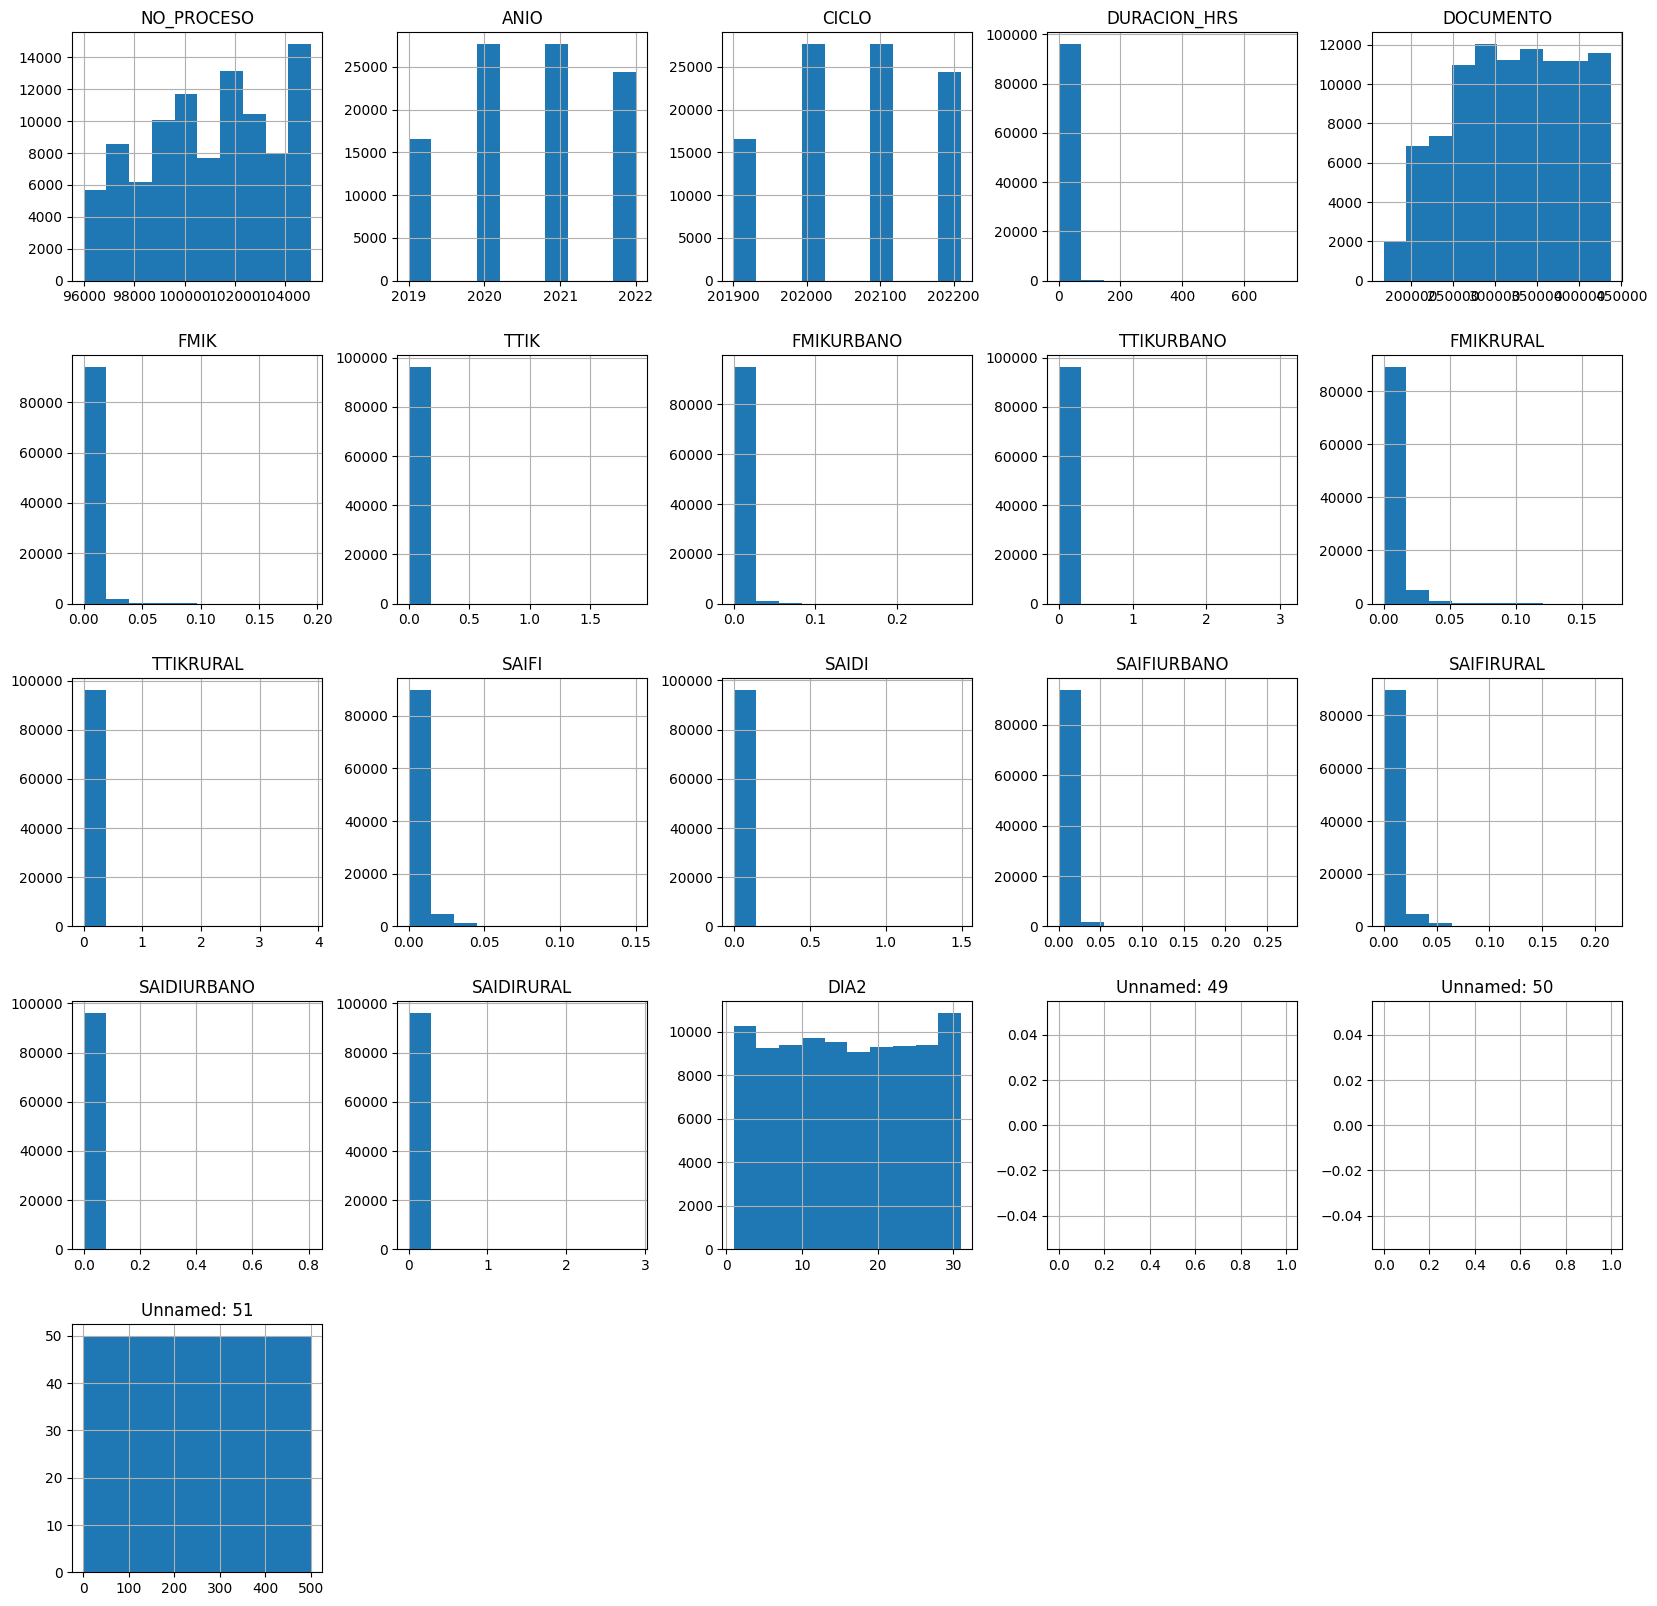

In [13]:
dato.hist(figsize=(20,20))

In [14]:
dato.describe()

,NO_PROCESO,ANIO,CICLO,DURACION_HRS,DOCUMENTO,FMIK,TTIK,FMIKURBANO,TTIKURBANO,FMIKRURAL,...,SAIFI,SAIDI,SAIFIURBANO,SAIFIRURAL,SAIDIURBANO,SAIDIRURAL,DIA2,Unnamed: 49,Unnamed: 50,Unnamed: 51
count,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,...,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,96197.000000,0.0,0.0,500.000000
mean,100999.262025,2020.621371,202068.694595,3.545379,322262.797769,0.002511,0.000873,0.001484,0.000549,0.003979,...,0.003468,0.001005,0.002098,0.004725,0.000596,0.001382,15.606620,NaN,NaN,250.500000
std,2540.980165,1.041980,104.030184,8.494913,68503.440255,0.006064,0.010966,0.006936,0.012119,0.009890,...,0.007699,0.008346,0.008631,0.011374,0.006109,0.014220,8.875767,NaN,NaN,144.481833
min,95977.000000,2019.000000,201901.000000,0.000000,167814.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,NaN,NaN,1.000000
25%,98989.000000,2020.000000,202004.000000,0.050000,268794.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000002,0.000004,0.000000,0.000000,0.000000,0.000000,8.000000,NaN,NaN,125.750000
50%,101240.000000,2021.000000,202103.000000,1.700000,324309.000000,0.000060,0.000020,0.000000,0.000000,0.000044,...,0.000098,0.000033,0.000000,0.000048,0.000000,0.000011,15.000000,NaN,NaN,250.500000
75%,103170.000000,2022.000000,202201.000000,3.350000,380425.000000,0.002500,0.000197,0.000060,0.000000,0.002839,...,0.003297,0.000277,0.000092,0.002875,0.000017,0.000230,23.000000,NaN,NaN,375.250000
max,105041.000000,2022.000000,202210.000000,735.950000,437815.000000,0.194467,1.880069,0.278695,3.079205,0.172179,...,0.150275,1.494497,0.272587,0.215247,0.808600,2.885472,31.000000,NaN,NaN,500.000000


In [15]:
dato.isnull().sum()

NO_PROCESO              0
DIA                     0
ANIO                    0
MES                     0
CICLO                   0
IDINTER                 0
IDREPOS                 0
SISTEMA                 0
ORIGEN                  0
TIPO                    0
RESOLUCIONSIGET     91477
FECHAIN                 0
FECHARP                 0
DURACION_HRS            0
TIPO_DURACION           0
APERTURA                0
REPOSICION              0
SSEE_1                  1
CKTO_1                  1
SSEE_2                  1
CKTO_2                  1
REGION                  0
DOCUMENTO               0
TIPO_TICKET             0
Causa General           0
Causa Especifica        0
'EST_TIEMPO'            0
COMMENTS            24977
FMIK                    0
TTIK                    0
FMIKURBANO              0
TTIKURBANO              0
FMIKRURAL               0
TTIKRURAL               0
SAIFI                   0
SAIDI                   0
SAIFIURBANO             0
SAIFIRURAL              0
SAIDIURBANO 

,variable_1,variable_2,r,abs_r
37,CICLO,ANIO,0.999552,0.999552
20,ANIO,CICLO,0.999552,0.999552
4,NO_PROCESO,DOCUMENTO,0.999425,0.999425
73,DOCUMENTO,NO_PROCESO,0.999425,0.999425
353,Unnamed: 51,DIA2,0.992989,0.992989
...,...,...,...,...
192,TTIKRURAL,FMIK,0.053334,0.053334
120,TTIK,FMIKRURAL,0.052320,0.052320
174,FMIKRURAL,TTIK,0.052320,0.052320
222,SAIFI,SAIDIRURAL,0.052025,0.052025


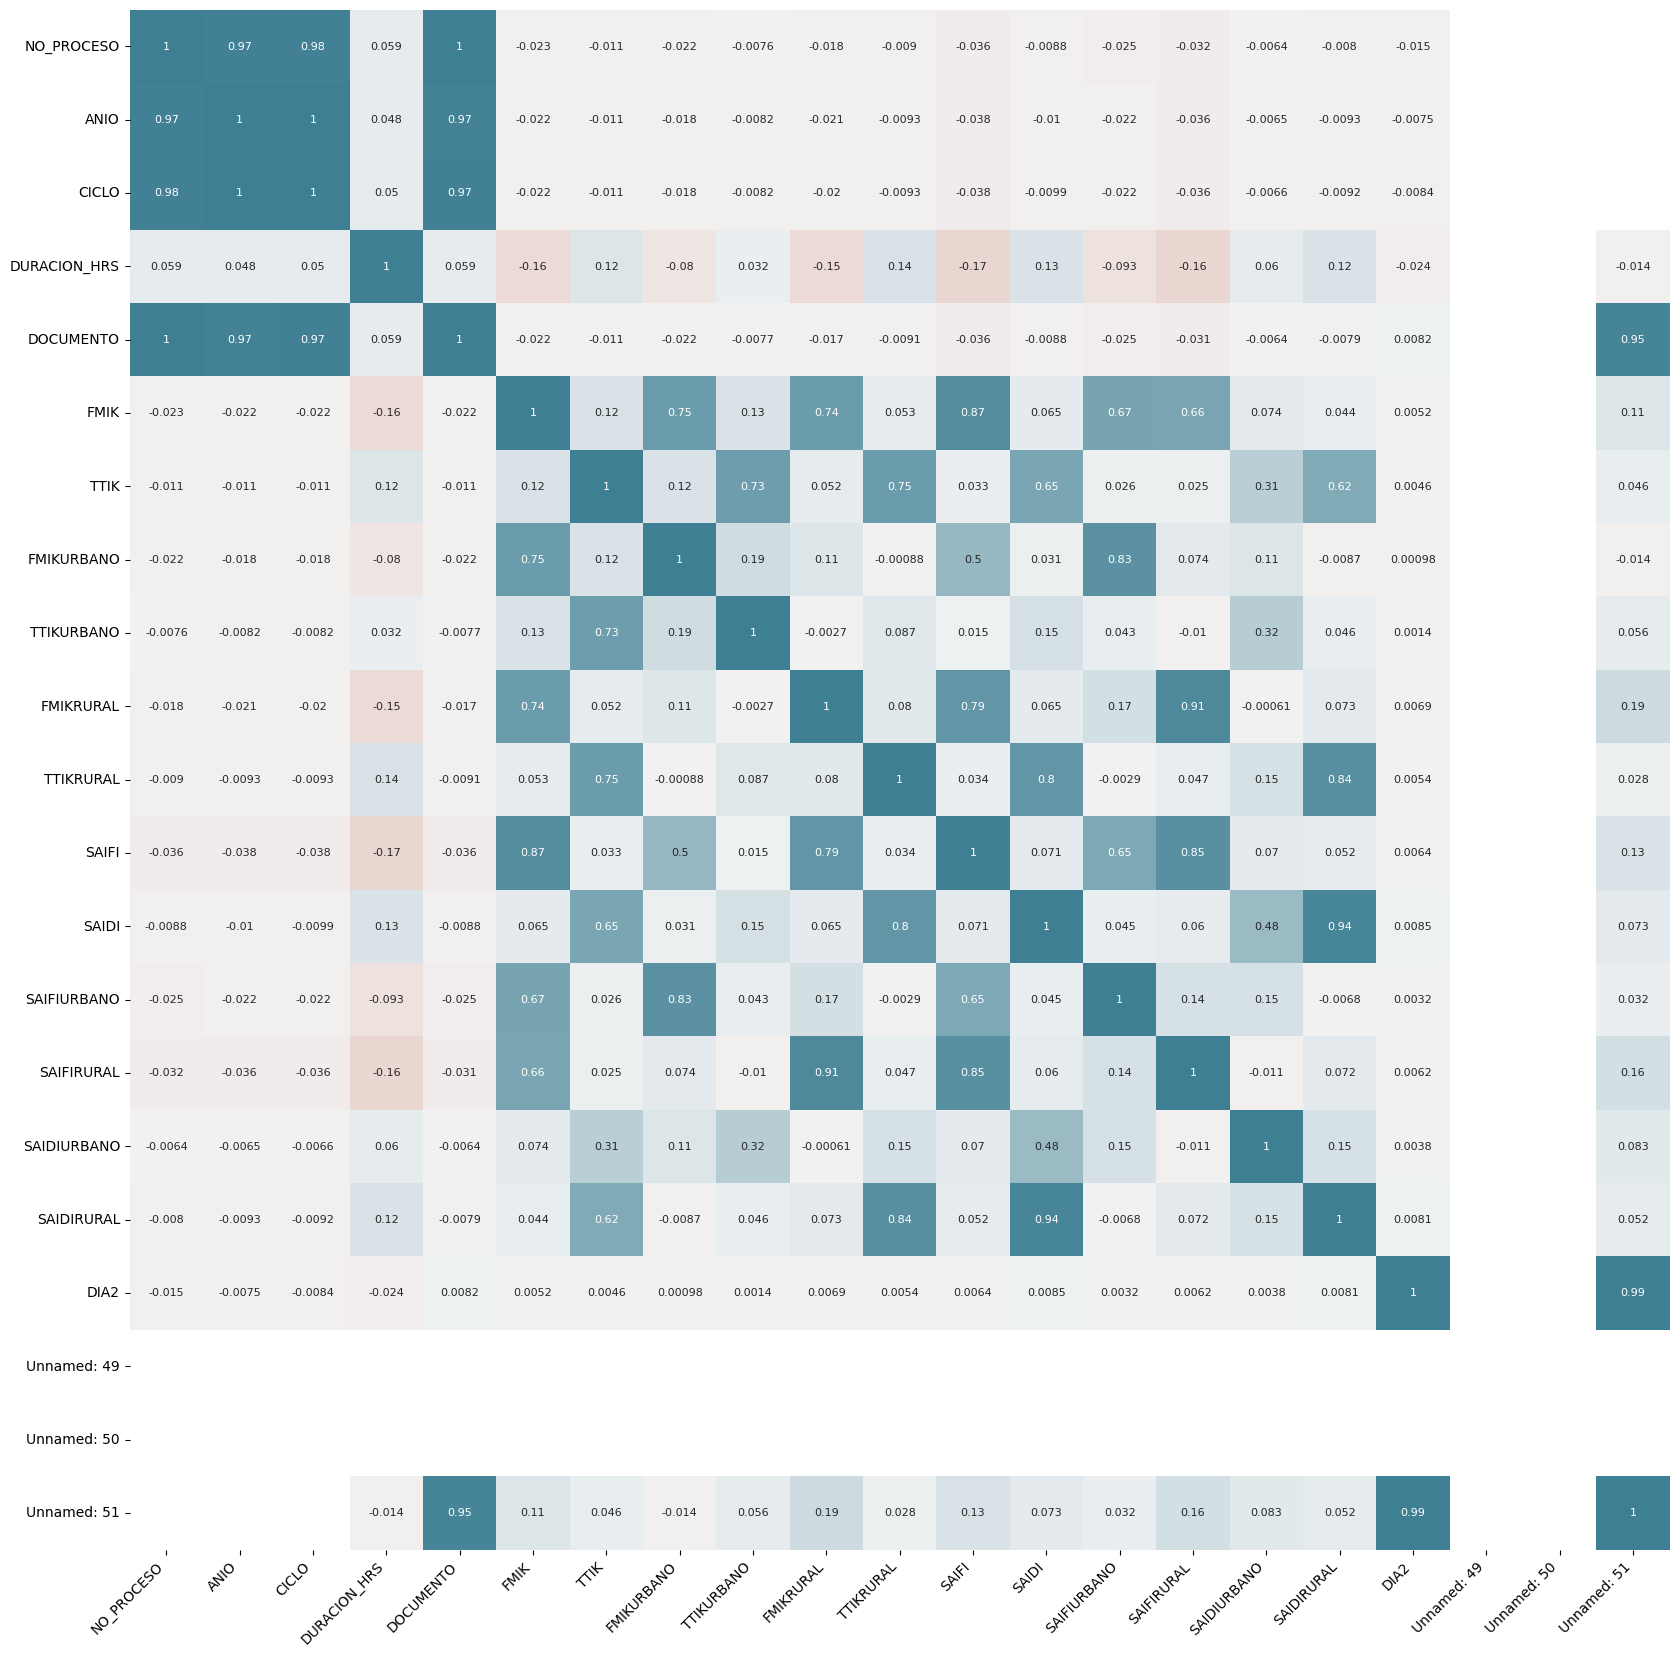

In [16]:
# MATRIZ DE CORRELLACION DE VARIABLES

# encontrar correlAacciones matematicas
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)
corr_matrix =dato.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(20)

# Heatmap matriz de correlaciones
# ==============================================================================
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(20,20))

sns.heatmap(
    corr_matrix,
    annot     = True,
    cbar      = False,
    annot_kws = {"size": 8},
    vmin      = -1,
    vmax      = 1,
    center    = 0,
    cmap      = sns.diverging_palette(20, 220, n=200),
    square    = True,
    ax        = ax
)

ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation = 45,
    horizontalalignment = 'right',
)

ax.tick_params(labelsize = 10)

def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    
    return(corr_mat)



corr_matrix = dato.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

In [17]:
def tidy_corr_matrix(corr_mat):
    '''
    Función para convertir una matriz de correlación de pandas en formato tidy
    '''
    corr_mat = corr_mat.stack().reset_index()
    corr_mat.columns = ['variable_1','variable_2','r']
    corr_mat = corr_mat.loc[corr_mat['variable_1'] != corr_mat['variable_2'], :]
    corr_mat['abs_r'] = np.abs(corr_mat['r'])
    corr_mat = corr_mat.sort_values('abs_r', ascending=False)
    return(corr_mat)

corr_matrix = dato.select_dtypes(include=['float64', 'int']).corr(method='pearson')
tidy_corr_matrix(corr_matrix).head(150)

,variable_1,variable_2,r,abs_r
37,CICLO,ANIO,0.999552,0.999552
20,ANIO,CICLO,0.999552,0.999552
4,NO_PROCESO,DOCUMENTO,0.999425,0.999425
73,DOCUMENTO,NO_PROCESO,0.999425,0.999425
353,Unnamed: 51,DIA2,0.992989,0.992989
...,...,...,...,...
192,TTIKRURAL,FMIK,0.053334,0.053334
120,TTIK,FMIKRURAL,0.052320,0.052320
174,FMIKRURAL,TTIK,0.052320,0.052320
222,SAIFI,SAIDIRURAL,0.052025,0.052025


In [18]:
dato.dtypes

NO_PROCESO            int64
DIA                  object
ANIO                  int64
MES                  object
CICLO                 int64
IDINTER              object
IDREPOS              object
SISTEMA              object
ORIGEN               object
TIPO                 object
RESOLUCIONSIGET      object
FECHAIN              object
FECHARP              object
DURACION_HRS        float64
TIPO_DURACION        object
APERTURA             object
REPOSICION           object
SSEE_1               object
CKTO_1               object
SSEE_2               object
CKTO_2               object
REGION               object
DOCUMENTO             int64
TIPO_TICKET          object
Causa General        object
Causa Especifica     object
'EST_TIEMPO'         object
COMMENTS             object
FMIK                float64
TTIK                float64
FMIKURBANO          float64
TTIKURBANO          float64
FMIKRURAL           float64
TTIKRURAL           float64
SAIFI               float64
SAIDI               

In [19]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'ANIO', 'MES', 'CICLO', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'REGION', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA2', 'MES3', 'Tipo_Eq.', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51'],
      dtype='object')

In [40]:
dato.dtypes

NO_PROCESO            int64
DIA                  object
año                   int64
MES                  object
ciclo                 int64
IDINTER              object
IDREPOS              object
SISTEMA              object
ORIGEN               object
TIPO                 object
RESOLUCIONSIGET      object
FECHAIN              object
FECHARP              object
DURACION_HRS        float64
TIPO_DURACION        object
APERTURA             object
REPOSICION           object
SSEE_1               object
CKTO_1               object
SSEE_2               object
CKTO_2               object
REGION               object
DOCUMENTO             int64
TIPO_TICKET          object
Causa General        object
Causa Especifica     object
'EST_TIEMPO'         object
COMMENTS             object
FMIK                float64
TTIK                float64
FMIKURBANO          float64
TTIKURBANO          float64
FMIKRURAL           float64
TTIKRURAL           float64
SAIFI               float64
SAIDI               

In [20]:
dato.rename(columns = {'ANIO':'año', 'CICLO':'ciclo'}, inplace = True)

In [21]:
dato.columns

Index(['NO_PROCESO', 'DIA', 'año', 'MES', 'ciclo', 'IDINTER', 'IDREPOS',
       'SISTEMA', 'ORIGEN', 'TIPO', 'RESOLUCIONSIGET', 'FECHAIN', 'FECHARP',
       'DURACION_HRS', 'TIPO_DURACION', 'APERTURA', 'REPOSICION', 'SSEE_1',
       'CKTO_1', 'SSEE_2', 'CKTO_2', 'REGION', 'DOCUMENTO', 'TIPO_TICKET',
       'Causa General', 'Causa Especifica', ''EST_TIEMPO'', 'COMMENTS', 'FMIK',
       'TTIK', 'FMIKURBANO', 'TTIKURBANO', 'FMIKRURAL', 'TTIKRURAL', 'SAIFI',
       'SAIDI', 'SAIFIURBANO', 'SAIFIRURAL', 'SAIDIURBANO', 'SAIDIRURAL',
       'KVAS_URBANOS', 'KVAS_RURALES', 'CLIENTES_U', 'CLIENTES_R', 'ENS_KWH',
       'ENS_MONTO', 'DIA2', 'MES3', 'Tipo_Eq.', 'Unnamed: 49', 'Unnamed: 50',
       'Unnamed: 51'],
      dtype='object')

In [38]:
print(dato['KVAS_URBANOS'].unique())

['0.000000' '456.122222' '8,641.755556' ... '15,741.188889' '3,097.733333'
 '9,264.800000']


In [32]:
print(dato['CLIENTES_U'].unique())

['1.000000' '18.000000' '20.000000' ... '1,285.000000' '14,128.000000'
 '552.000000']


In [36]:

print(dato['TIPO_DURACION'].unique())

['SOSTENIDA' 'MOMENTANEA']


In [37]:
print(dato['TIPO'].unique())

['F' 'P' 'M']


In [34]:
print(dato['CLIENTES_R'].unique())

['95.000000' '2,672.000000' '3,990.000000' ... '3,936.000000'
 '11,495.000000' '11,092.000000']


In [22]:
print(dato['año'].unique())

[2019 2020 2021 2022]


In [23]:
print(dato['MES'].unique())

['ENE' 'FEB' 'MAR' 'ABR' 'MAY' 'JUN' 'JUL' 'AGO' 'SEPT' 'OCT' 'NOV' 'DIC'
 'SEP']


In [24]:
print(dato['ciclo'].unique())

[201901 201902 201903 201904 201905 201906 201907 201908 201909 201910
 201911 201912 202001 202002 202003 202004 202005 202006 202007 202008
 202009 202010 202011 202012 202101 202102 202103 202104 202105 202106
 202107 202108 202109 202110 202111 202112 202201 202202 202203 202204
 202205 202206 202207 202208 202209 202210]


In [25]:
print(dato['APERTURA'].unique())

['CT3754' 'R152-02' 'R202-01' ... '519692501' '208328401' '516136401']


In [26]:
print(dato['Causa General'].unique())

['Falla Delsur' 'Cliente Sin Servicio' 'Fuerza Mayor'
 'Trabajos Programados Delsur' 'Fallas Otros Operadores'
 'Orden Trabajo P/Operac.Y Mtto' 'T.Programados Otros Operadores'
 'Reclamo No Procedente' 'Reclamos Por Mal Voltaje' 'No procedente']


In [27]:
print(dato['Causa Especifica'].unique())

['Transitorio de aislación' 'Aves o Animales' 'Sobrecarga de Línea'
 'Línea BT Rota' 'Interrup por Falso Contacto'
 'Solicitud Cliente S/Afect 3ero' 'Rama sobre línea'
 'Maniobra por Emergencia' 'Cambio de Poste' 'Falso Contacto MT'
 'Falso Contacto BT' 'Cortacircuito Dañado' 'Trabajo Prog. en Vía Publica'
 'Interrupcion P/daño acometida' 'Aislamiento Dañado'
 'Mantenimiento Preventivo Gral' 'Línea MT Rota' 'Poste Chocado'
 'PAM ETESAL' 'Mejora de Voltaje' 'Trabajo por Construcción'
 'Mantto. Preventivo Subestación' 'Cambio de Línea MT' 'Caida de Árbol'
 'ETESAL Baja Frecuencia' 'Fuertes Vientos' 'Objeto Lanzado a Red'
 'Enredadera' 'Aislación con daños' 'Maniobra Normalizacion Falla' 'Poda'
 'Conductor MT con Problemas' 'Maniobra Programada'
 'Terceros - Poda de árboles' 'Cambio de Estructuras' 'Poste Deteriorado'
 'Falla Instalación Inadecuada' 'Protección operada P Terceros'
 'Cambio de Aislamiento' 'Hurto de Equipos, Líneas etc'
 'Amarradera Suelta' 'Mala Coordinación Protecciones'

In [28]:
print(dato['CKTO_1'].unique())

# alimentador




['AL072' 'AL152' 'AL202' 'AL011' 'AL172' 'AL017' 'AL091' 'AL203' 'PCV172'
 'AL122' 'AL061' 'AL46481' 'AL123' 'AL043' 'AL013' 'AL121' 'AL251' 'AL171'
 'AL044' 'AL142' 'AL133' 'AL181' 'AL071' 'AL132' 'AL062' 'AL241' 'AL182'
 'AL231' 'AL053' 'AL192' 'AL012' 'AL022' 'AL100' 'AL222' 'AL212' 'AL015'
 'AL021' 'AL173' 'AL194' 'AL44481' 'AL191' 'AL101' 'AL131' 'AL016' 'AL272'
 'AL162' 'AL042' 'AL112' 'AL174' 'AL232' 'AL051' 'AL014' 'AL041' 'AL124'
 'AL223' 'AL102' 'AL113' 'AL163' 'AL161' 'AL30485' 'AL031' 'AL30484'
 'AL39482' 'AL160' 'AL242' 'AL38484' 'AL103' 'AL213' 'AL41731' 'AL052'
 'AL081' 'AL111' 'AL141' 'AL221' 'AL271' 'AL47482' 'AL201' 'AL211' 'AL151'
 'AL210' 'AL32481' 'AL032' 'AL143' 'AL37285' 'AL193' 'AL35484' 'AL47481'
 'AL42283' 'AL44486' 'AL45281' 'AL050' 'AL38482' 'AL50481' 'AL190'
 'AL39481' 'AL220' 'AL020' 'AL150' 'AL46484' 'AL13482' 'AL204' 'AL42282'
 'AL240' 'AL47483' 'AL060' 'AL47484' 'AL46483' nan]


In [29]:
print(dato['CKTO_2'].unique())

# alimentador

['AL072' 'AL152' 'AL202' 'AL011' 'AL172' 'AL017' 'AL091' 'AL44481'
 'PCV172' 'AL122' 'AL061' 'AL042' 'AL123' 'AL043' 'AL013' 'AL121'
 'AL38482' 'AL171' 'AL044' 'AL142' 'AL133' 'AL181' 'AL071' 'AL251' 'AL132'
 'AL39482' 'AL47482' 'AL062' 'AL241' 'AL32481' 'AL35484' 'AL231' 'AL053'
 'AL50481' 'AL012' 'AL022' 'AL46483' 'AL222' 'AL212' 'AL015' 'AL021'
 'AL173' 'AL194' 'AL101' 'AL46484' 'AL47484' 'AL016' 'AL272' 'AL46481'
 'AL131' 'AL162' 'AL42282' 'AL47481' 'AL47483' 'AL174' 'AL232' 'AL051'
 'AL014' 'AL041' 'AL223' 'AL203' 'AL192' 'AL102' 'AL39481' 'AL163'
 'AL30485' 'AL031' 'AL30484' 'AL242' 'AL38484' 'AL103' 'AL41731' 'AL052'
 'AL081' 'AL112' 'AL111' 'AL141' 'AL221' 'AL271' 'AL201' 'AL113' 'AL211'
 'AL151' 'AL161' 'AL032' 'AL182' 'AL193' 'AL213' 'AL42283' 'AL44486'
 'AL124' 'AL37285' 'AL191' 'AL13482' 'AL45281' 'AL143' 'AL204' nan]


In [39]:
dato['Total_cliente']=dato['CLIENTES_U']+dato['CLIENTES_R']

In [42]:
print(dato['CLIENTES_U'].unique())

['1.000000' '18.000000' '20.000000' ... '1,285.000000' '14,128.000000'
 '552.000000']


In [43]:
print(dato['CLIENTES_R'].unique())

['95.000000' '2,672.000000' '3,990.000000' ... '3,936.000000'
 '11,495.000000' '11,092.000000']


In [41]:
print(dato['Total_cliente'].unique())

['1.00000095.000000' '18.0000002,672.000000' '20.0000003,990.000000' ...
 '7,008.000000962.000000' '0.0000003,992.000000' '0.00000011,092.000000']


In [30]:
# define linear regression


class LinearRegressionGD:
    def __init__(self, eta=0.01, n_iter=50, random_state=1):
        self.eta = eta
        self.n_iter = n_iter
        self.random_state = random_state

    def fit(self, X, y):
        rgen = np.random.RandomState(self.random_state)
        self.w_ = rgen.normal(loc=0.0, scale=0.01, size=X.shape[1])
        self.b_ = np.array([0.])
        self.losses_ = []

        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_ += self.eta * 2.0 * X.T.dot(errors) / X.shape[0]
            self.b_ += self.eta * 2.0 * errors.mean()
            loss = (errors**2).mean()
            self.losses_.append(loss)
        return self

    def net_input(self, X):
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        return self.net_input(X)